In [18]:
import os
import json

from typing import List
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
SRC = "tmp"

In [20]:
def get_files() -> List[str]:
    return [os.path.join(root, file) for root, _, files in os.walk(SRC) for file in files]

## Posts pre day per website

In [38]:
site_date_count = {}
site_date_ids = []
for file in get_files():
    site = file.split("/")[1]
    with open(file, "r") as f:
        data = json.load(f)
        key = (site, data["publish_date"])
        site_date_count[key] = site_date_count.get(key, 0) + 1
        site_date_ids.append((site, data["publish_date"], data["id"]))

In [39]:
(sites, dates), counts = zip(*list(site_date_count.keys())), site_date_count.values()
sites_dates_counts = pd.DataFrame({"site": sites, "date": dates, "count": counts})
sites_dates_counts["date"] = pd.to_datetime(sites_dates_counts["date"])

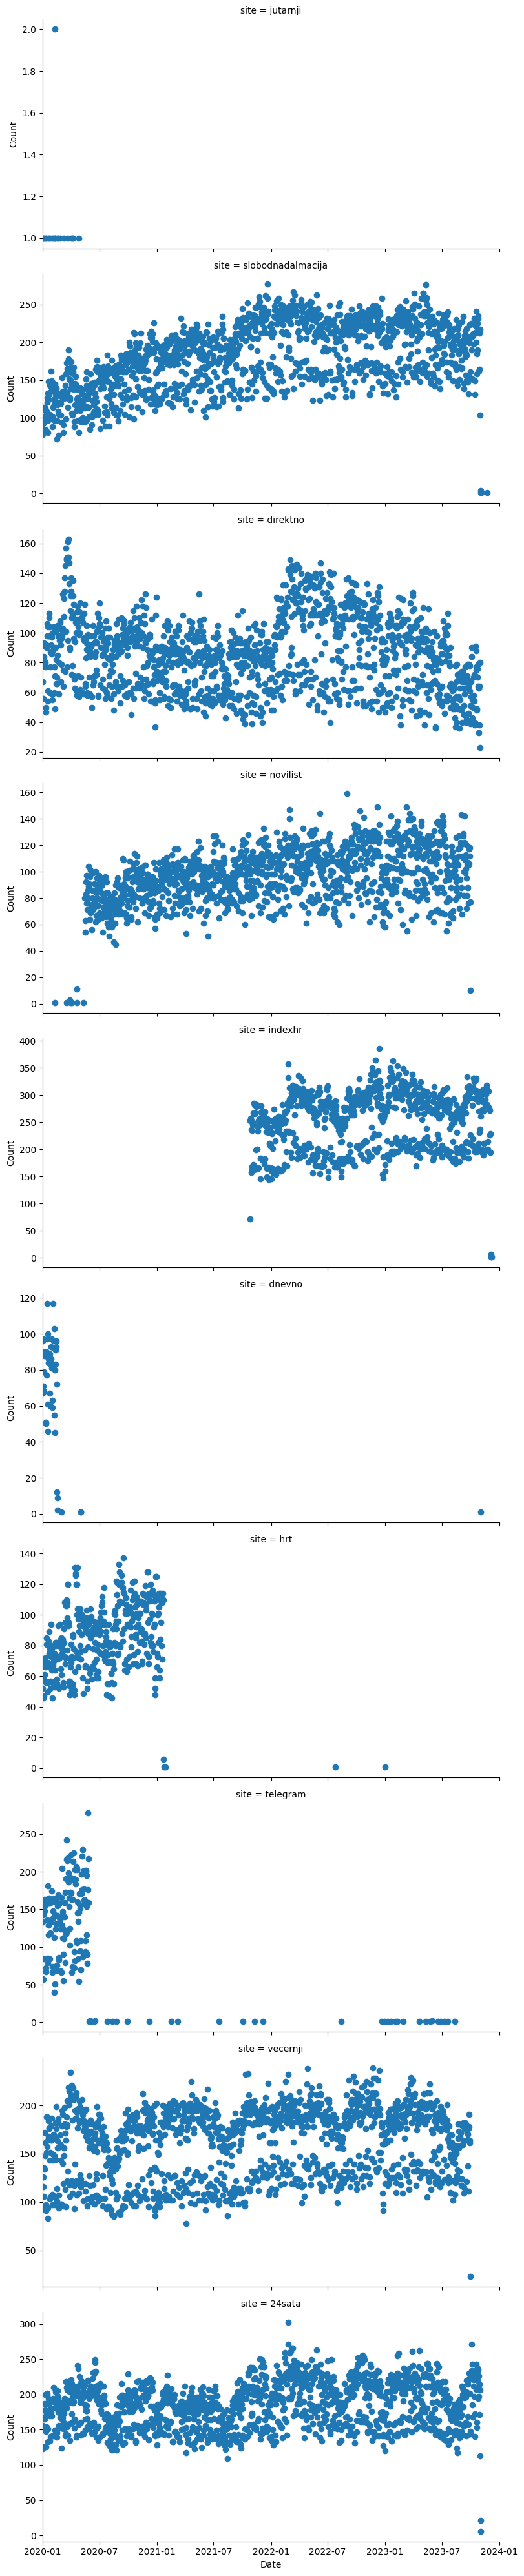

In [40]:
g = sns.FacetGrid(sites_dates_counts, row="site", height=4, aspect=2, sharey=False)
g.map(plt.scatter, "date", "count")
plt.xlim(datetime(2020, 1, 1), datetime(2024, 1, 1))
g.set_axis_labels("Date", "Count");

## Does Ids follow dates?

In [41]:
sites, dates, ids = zip(*site_date_ids)
sites_dates_ids = pd.DataFrame({"site": sites, "date": dates, "id": ids})
sites_dates_ids['date'] = pd.to_datetime(sites_dates_ids['date'])

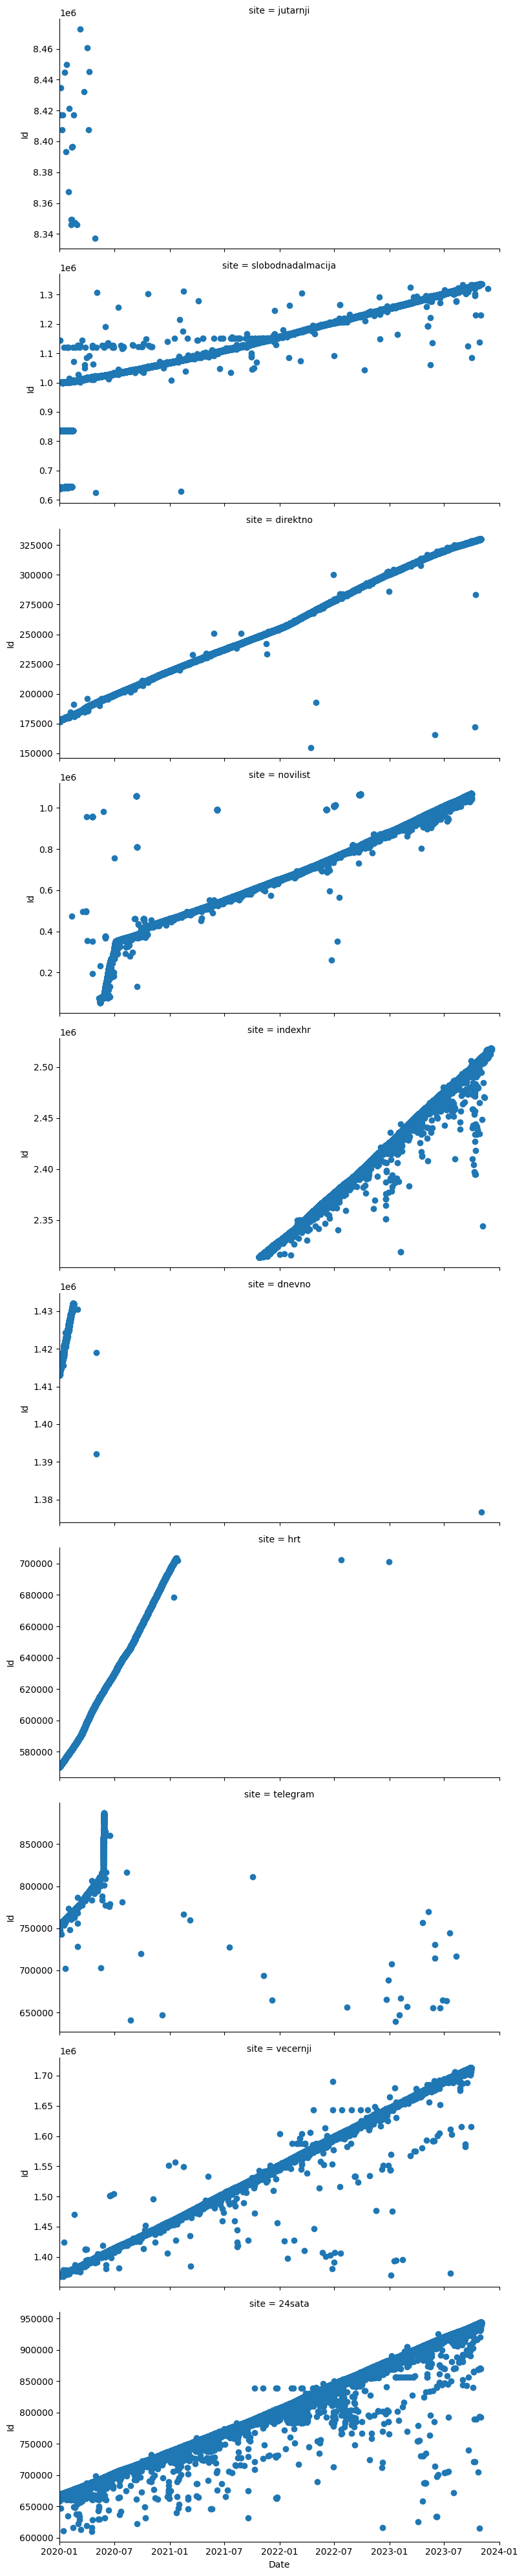

In [42]:
g = sns.FacetGrid(sites_dates_ids, row="site", height=4, aspect=2, sharey=False)
g.map(plt.scatter, "date", "id")
plt.xlim(datetime(2020, 1, 1), datetime(2024, 1, 1))
g.set_axis_labels("Date", "Id");

In [43]:
sites_dates_counts.groupby("site")["date"].min()

site
24sata              2020-01-01
direktno            2020-01-01
dnevno              2020-01-01
hrt                 2020-01-01
indexhr             2021-10-25
jutarnji            2020-01-04
novilist            2020-02-10
slobodnadalmacija   2020-01-01
telegram            2020-01-01
vecernji            2020-01-01
Name: date, dtype: datetime64[ns]

In [44]:
sites_dates_counts.groupby("site")["date"].max()

site
24sata              2023-11-03
direktno            2023-11-01
dnevno              2023-11-03
hrt                 2022-12-31
indexhr             2023-12-07
jutarnji            2020-04-27
novilist            2023-10-01
slobodnadalmacija   2023-11-23
telegram            2023-08-11
vecernji            2023-09-30
Name: date, dtype: datetime64[ns]